--- Inspeccionando archivo: shhs1-200001.parquet ---
✅ 1. Lectura del archivo: Éxito. El archivo no está corrupto.

✅ 2. Verificación de Dimensiones:
   - Número de épocas (filas): 1084
   - Número total de columnas: 4561
   - ¡CORRECTO! El número de columnas (4560 de datos + 1 de etiqueta) es el esperado.

✅ 3. Verificación de Columnas y Tipos de Datos:
   - ¡CORRECTO! La columna 'label' existe.
   - ¡CORRECTO! La columna 'label' contiene números enteros.

✅ 4. Análisis de las Etiquetas de Sueño:
   Distribución de las etapas encontradas en este sujeto:
label
0    333
1     47
2    457
3    145
4    102
   (0=W, 1=N1, 2=N2, 3=N3, 4=REM)

✅ 5. Inspección Visual de un Espectrograma:


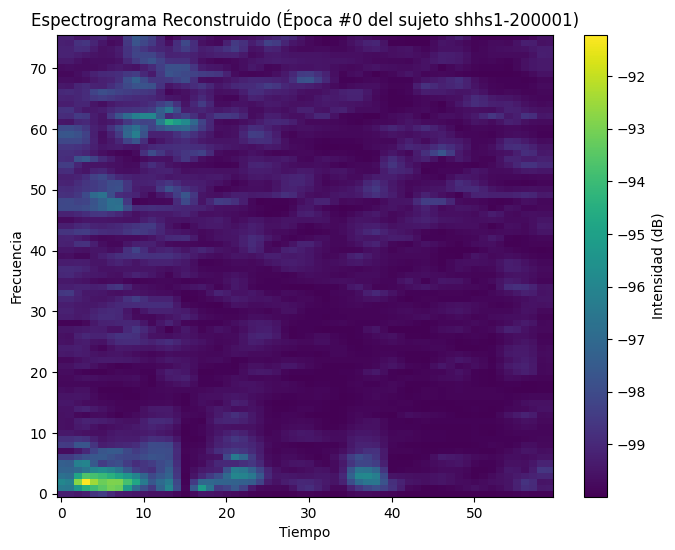

   - Si la imagen de arriba se ve como un espectrograma, ¡el procesamiento es correcto!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------------------------------------------------------------
# ¡¡IMPORTANTE!! CAMBIA ESTA RUTA
# ------------------------------------------------------------------------------------
# Pon aquí la ruta a UNO de los archivos .parquet que ya se han creado.
# Puedes obtenerla haciendo clic derecho -> "Copiar ruta" en el explorador de Colab.
path_al_archivo_parquet = Path('/content/drive/MyDrive/shhs_processed/shhs1-200001.parquet')
# ------------------------------------------------------------------------------------


print(f"--- Inspeccionando archivo: {path_al_archivo_parquet.name} ---")

try:
    # 1. Intentar leer el archivo
    df = pd.read_parquet(path_al_archivo_parquet)
    print("✅ 1. Lectura del archivo: Éxito. El archivo no está corrupto.")

    # 2. Verificar las dimensiones
    num_epocas, num_columnas = df.shape
    print(f"\n✅ 2. Verificación de Dimensiones:")
    print(f"   - Número de épocas (filas): {num_epocas}")
    print(f"   - Número total de columnas: {num_columnas}")

    # Un espectrograma de 76x60 aplanado tiene 4560 píxeles + 1 columna de etiqueta = 4561
    if num_columnas == 4561:
        print("   - ¡CORRECTO! El número de columnas (4560 de datos + 1 de etiqueta) es el esperado.")
    else:
        print(f"   - ⚠️ ¡ALERTA! Se esperaban 4561 columnas, pero se encontraron {num_columnas}.")

    # 3. Verificar las columnas y los tipos de datos
    print("\n✅ 3. Verificación de Columnas y Tipos de Datos:")
    if 'label' in df.columns:
        print("   - ¡CORRECTO! La columna 'label' existe.")
        if pd.api.types.is_integer_dtype(df['label']):
            print("   - ¡CORRECTO! La columna 'label' contiene números enteros.")
        else:
            print(f"   - ⚠️ ¡ALERTA! La columna 'label' no es de tipo entero, es {df['label'].dtype}.")
    else:
        print("   - ❌ ¡ERROR! No se encontró la columna 'label'.")

    # 4. Analizar la distribución de las etiquetas
    print("\n✅ 4. Análisis de las Etiquetas de Sueño:")
    print("   Distribución de las etapas encontradas en este sujeto:")
    print(df['label'].value_counts().sort_index().to_string())
    print("   (0=W, 1=N1, 2=N2, 3=N3, 4=REM)")

    # 5. Visualizar un espectrograma para una inspección visual
    print("\n✅ 5. Inspección Visual de un Espectrograma:")

    # Tomamos la primera época (la primera fila)
    primera_epoca_plana = df.iloc[0, :-1].values

    # La remodelamos a su forma original de 76x60
    espectrograma_reconstruido = primera_epoca_plana.reshape(76, 60)

    plt.figure(figsize=(8, 6))
    plt.imshow(espectrograma_reconstruido, aspect='auto', cmap='viridis', origin='lower')
    plt.colorbar(label='Intensidad (dB)')
    plt.title(f'Espectrograma Reconstruido (Época #0 del sujeto {path_al_archivo_parquet.stem})')
    plt.xlabel('Tiempo')
    plt.ylabel('Frecuencia')
    plt.show()
    print("   - Si la imagen de arriba se ve como un espectrograma, ¡el procesamiento es correcto!")

except Exception as e:
    print(f"\n❌ ¡ERROR FATAL AL PROCESAR EL ARCHIVO! Razón: {e}")